**Importing all the necessary libraries**

In [56]:
import pandas as pd 
import numpy as py 
import matplotlib.pyplot as mp
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)


In [3]:
#  Reading the csv file in to the data frame 
fifa_df = pd.read_csv('data.csv')

In [4]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


In [5]:
fifa_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [6]:
# Analysing the description of the overall data 
fifa_df.shape

(18944, 106)

In [7]:
fifa_df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,1.794900e+04,18719.000000,18719.000000,1127.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,2.936603,2.363017,4.296353e+06,20.589668,2021.983332,12.029281,67.668110,52.274954,57.139434,62.455430,51.316292,64.458988,65.164186,62.889102,61.719635,66.108017,37.203553,63.171867,49.612859,45.796083,51.874578,58.705448,42.669552,55.546400,47.187289,42.356155,52.653030,58.482791,64.285103,64.326489,63.333193,61.609428,63.918549,57.752798,64.590530,62.596020,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,0.667132,0.766469,1.005968e+07,17.057568,1.260426,6.674627,10.984862,13.991421,10.273655,10.048706,16.405179,9.746706,7.710474,7.328945,7.575184,8.126601,10.714523,8.565969,18.153057,19.592269,17.321709,14.572383,17.661569,18.787112,18.231204,17.239561,15.205281,16.598040,14.926452,14.689422,14.625189,9.112954,14.075215,13.330631,11.888479,15.878793,12.519775,19.305319,17.203045,20.738106,19.443738,13.724072,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,9.000000e+03,1.000000,2020.000000,1.000000,25.000000,16.000000,25.000000,25.000000,15.000000,28.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000,6.000000,3.000000,5.000000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,13.000000,12.000000,14.000000,24.000000,12.000000,18.000000,15.000000,12.000000,16.000000,4.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,5.250000e+05,9.000000,2021.000000,6.000000,62.000000,42.000000,50.000000,57.000000,36.000000,58.000000,60.000000,58.000000,57.000000,60.000000,28.000000,57.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,35.000000,31.000000

In [8]:
fifa_df.duplicated().sum()  #--> No Duplicated Values in rows 

np.int64(0)

In [9]:
# Maintaining a Copy of my Data Cell 
df_main= fifa_df.copy()

In [10]:
fifa_df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

**Three Columns Related to the GoalKeeping**

In [11]:
fifa_df.drop(columns=['sofifa_id','player_url','dob','body_type','team_jersey_number','contract_valid_until','nation_jersey_number','player_tags','loaned_from','joined','preferred_foot','weak_foot','release_clause_eur','long_name','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes'],inplace=True)

In [12]:
fifa_df.shape

(18944, 87)

In [13]:
fifa_df.head()

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,international_reputation,skill_moves,work_rate,real_face,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",5,4,Medium/Low,Yes,CAM,RW,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",5,5,High/Low,Yes,LS,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,3,1,Medium/Medium,Yes,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,4,4,High/Medium,Yes,ST,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",5,5,High/Medium,Yes,LW,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


**Combining the GoalKeeper Attributes**

In [14]:
# Comnbining the GoalKeeper Attributes 
fifa_df['gk_average']=(fifa_df['gk_diving']+fifa_df['gk_handling']+fifa_df['gk_kicking']+fifa_df['gk_positioning']+fifa_df['gk_reflexes']+fifa_df['gk_speed'])/6
# Deleting the Unecessary goal attributes
fifa_df.drop(columns=['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],inplace=True)

**Combining the Attacking Attributes**

In [15]:
fifa_df['attacking_average']=(fifa_df['attacking_crossing']+fifa_df['attacking_finishing']+fifa_df['attacking_heading_accuracy']+fifa_df['attacking_short_passing']+fifa_df['attacking_volleys'])/5
# Dropping the same columns from the Data Set 
fifa_df.drop(columns=['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys'],inplace=True)

In [16]:
fifa_df.shape

(18944, 78)

**Height and the Weight Parameters can be Combined together using BMI**
kg/m*2

In [17]:
# Calculating the BMI Using the Proper Standards 
fifa_df["BMI"]=fifa_df['weight_kg']/((fifa_df['height_cm']*0.01)**2)
# Dropping the Attributes
fifa_df.drop(columns=['weight_kg','height_cm'],inplace=True)
fifa_df.shape

(18944, 77)

In [18]:
fifa_df.head()

,short_name,age,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,international_reputation,skill_moves,work_rate,real_face,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,player_traits,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk_average,attacking_average,BMI
0,L. Messi,33,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",5,4,Medium/Low,Yes,CAM,RW,85.0,92.0,91.0,95.0,38.0,65.0,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,NaN,85.8,24.913495
1,Cristiano Ronaldo,35,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",5,5,High/Low,Yes,LS,LS,89.0,93.0,81.0,89.0,35.0,77.0,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,NaN,87.4,23.735308
2,J. Oblak,27,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,3,1,Medium/Medium,Yes,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,"GK Long Throw, Comes For Crosses",12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,81.5,19.0,24.615211
3,R. Lewandowski,31,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,4,4,High/Medium,Yes,ST,NaN,78.0,91.0,78.0,85.0,43.0,82.0,"Solid Player, Finesse Shot, Outside Foot Shot,...",85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,NaN,84.6,23.629490
4,Neymar Jr,28,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",5,5,High/Medium,Yes,LW,NaN,91.0,85.0,86.0,94.0,36.0,59.0,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,NaN,81.6,22.204082


**Combine Skill Parameters**

In [19]:
# Combining the Skill Movement and the Power Parameters 
# Average can be Considered cause all the parameters lie along the same range

fifa_df['skill_avg']=(fifa_df['skill_ball_control']+fifa_df['skill_curve']+fifa_df['skill_dribbling']+fifa_df['skill_fk_accuracy']+fifa_df['skill_long_passing'])/5
# Dropping the Columns 
fifa_df.drop(columns=['skill_ball_control','skill_curve','skill_dribbling','skill_fk_accuracy','skill_long_passing'],inplace=True)
fifa_df.shape

(18944, 73)

**Combine Mentallity as one as all attributes has the same scaling or range of values**

In [20]:
fifa_df['Mentality_avg']=(fifa_df['mentality_aggression']+fifa_df['mentality_composure']+fifa_df['mentality_interceptions']+fifa_df['mentality_penalties']+fifa_df['mentality_positioning']+fifa_df['mentality_vision'])/6
# Dropping all the mentality columns 
fifa_df.drop(columns=['mentality_aggression','mentality_composure','mentality_interceptions','mentality_penalties','mentality_positioning','mentality_vision'],inplace =True)

In [21]:
fifa_df.shape

(18944, 68)

**Combining Movements**

In [22]:
fifa_df.head()

,short_name,age,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,international_reputation,skill_moves,work_rate,real_face,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,player_traits,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk_average,attacking_average,BMI,skill_avg,Mentality_avg
0,L. Messi,33,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",5,4,Medium/Low,Yes,CAM,RW,85.0,92.0,91.0,95.0,38.0,65.0,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",91,80,91,94,95,86,68,72,69,94,NaN,35,24,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,NaN,85.8,24.913495,94.0,73.833333
1,Cristiano Ronaldo,35,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",5,5,High/Low,Yes,LS,LS,89.0,93.0,81.0,89.0,35.0,77.0,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",87,91,87,95,71,94,95,84,78,93,NaN,32,24,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,NaN,87.4,23.735308,82.8,74.666667
2,J. Oblak,27,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,3,1,Medium/Medium,Yes,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,"GK Long Throw, Comes For Crosses",43,60,67,88,49,59,78,41,78,12,NaN,12,18,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,81.5,19.0,24.615211,21.8,34.666667
3,R. Lewandowski,31,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,4,4,High/Medium,Yes,ST,NaN,78.0,91.0,78.0,85.0,43.0,82.0,"Solid Player, Finesse Shot, Outside Foot Shot,...",77,78,77,93,82,89,84,76,86,85,NaN,42,19,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,NaN,84.6,23.629490,81.4,79.833333
4,Neymar Jr,28,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",5,5,High/Medium,Yes,LW,NaN,91.0,85.0,86.0,94.0,36.0,59.0,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",94,89,96,91,83,80,62,81,50,84,NaN,30,29,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,NaN,81.6,22.204082,89.6,74.833333


In [23]:
fifa_df['Movements_avg']=(fifa_df['movement_acceleration']+fifa_df['movement_agility']+fifa_df['movement_balance']+fifa_df['movement_reactions']+fifa_df['movement_sprint_speed'])/5
fifa_df.drop(columns=['movement_acceleration','movement_agility','movement_balance','movement_reactions','movement_sprint_speed'],inplace=True)

**Combining Powers**

In [24]:
fifa_df['Power_avg']=(fifa_df['power_jumping']+fifa_df['power_long_shots']+fifa_df['power_shot_power']+fifa_df['power_stamina']+fifa_df['power_strength'])/5
# Dropping the Columns From the Data Sets 
fifa_df.drop(columns=['power_jumping','power_long_shots','power_shot_power','power_stamina','power_strength'],inplace=True)

In [25]:
fifa_df.shape

(18944, 60)

In [26]:
#Checking if all the Parameterso of the Defending are defined on the same scale 
print(fifa_df['defending_marking'].max())
print(fifa_df['defending_standing_tackle'].max())
print(fifa_df['defending_sliding_tackle'].max())
# Hence it can be Proved that all the Parameters in the Defending Sections are Defined on the Same Scale 
#and can be combined using the mean or the weighted mean 
fifa_df['defending_avg']=(fifa_df['defending_marking']+fifa_df['defending_sliding_tackle']+fifa_df['defending_standing_tackle'])/3
# Dropping the Columns from the Data Set
fifa_df.drop(columns=['defending_marking','defending_sliding_tackle','defending_standing_tackle'])

nan
93
90


,short_name,age,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,international_reputation,skill_moves,work_rate,real_face,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk_average,attacking_average,BMI,skill_avg,Mentality_avg,Movements_avg,Power_avg,defending_avg
0,L. Messi,33,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",5,4,Medium/Low,Yes,CAM,RW,85.0,92.0,91.0,95.0,38.0,65.0,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,NaN,85.8,24.913495,94.0,73.833333,90.2,77.8,NaN
1,Cristiano Ronaldo,35,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",5,5,High/Low,Yes,LS,LS,89.0,93.0,81.0,89.0,35.0,77.0,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,NaN,87.4,23.735308,82.8,74.666667,86.2,88.8,NaN
2,J. Oblak,27,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,3,1,Medium/Medium,Yes,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,"GK Long Throw, Comes For Crosses",33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,81.5,19.0,24.615211,21.8,34.666667,61.4,53.6,NaN
3,R. Lewandowski,31,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,4,4,High/Medium,Yes,ST,NaN,78.0,91.0,78.0,85.0,43.0,82.0,"Solid Player, Finesse Shot, Outside Foot Shot,...",89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,NaN,84.6,23.629490,81.4,79.833333,81.4,84.0,NaN
4,Neymar Jr,28,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",5,5,High/Medium,Yes,LW,NaN,91.0,85.0,86.0,94.0,36.0,59.0,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,NaN,81.6,22.204082,89.6,74.833333,90.6,71.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,Colombia,América de Cali,Colombian Liga Postobón,1.0,47,52,40000,500,CM,1,2,Medium/Medium,No,SUB,NaN,63.0,37.0,50.0,47.0,41.0,50.0,NaN,44+2,44+2,44+2,47+0,45+0,45+0,45+0,47+0,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,NaN,41.4,23.566632,42.6,42.166667,60.2,45.4,NaN
18940,Zhang Mengxuan,21,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,47,52,35000,1000,CB,1,2,Low/Low,No,SUB,NaN,58.0,23.0,26.0,27.0,50.0,48.0,NaN,32+2,32+2,32+2,30+0,30+0,30+0,30+0,30+0,29+2,29+2,29+2,31+2,32+2,32+2,32+2,31+2,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,NaN,28.2,22.343516,22.2,36.500000,55.8,44.6,NaN
18941,Wang Zhenghao,20,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,51,35000,1000,CB,1,2,Low/Medium,No,RES,NaN,51.0,25.0,29.0,36.0,45.0,55.0,NaN,34+2,34+2,34+2,33+0,33+0,33+0,33+0,33+0,33+2,33+2,33+2,35+2,35+2,35+2,35+2,35+2,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2,NaN,29.6,21.621622,27.0,36.000000,49.0,47.8,NaN
18942,Chen Zitong,23,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,51,40000,1000,CM,1,2,Low/Low,No,RDM,NaN,61.0,35.0,48.0,48.0,44.0,58.0,NaN,44+2,44+2,44+2,46+0,45+0,45+0,45+0,46+0,47+2,47+2,47+2,47+2,47+2,47+2,47+2,47+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2,NaN,40.6,23.124061,43.4,42.833333,57.0,49.0,NaN


**value_counts()**
It is used to calculate the occurence of each and every element in the dataframe or series`

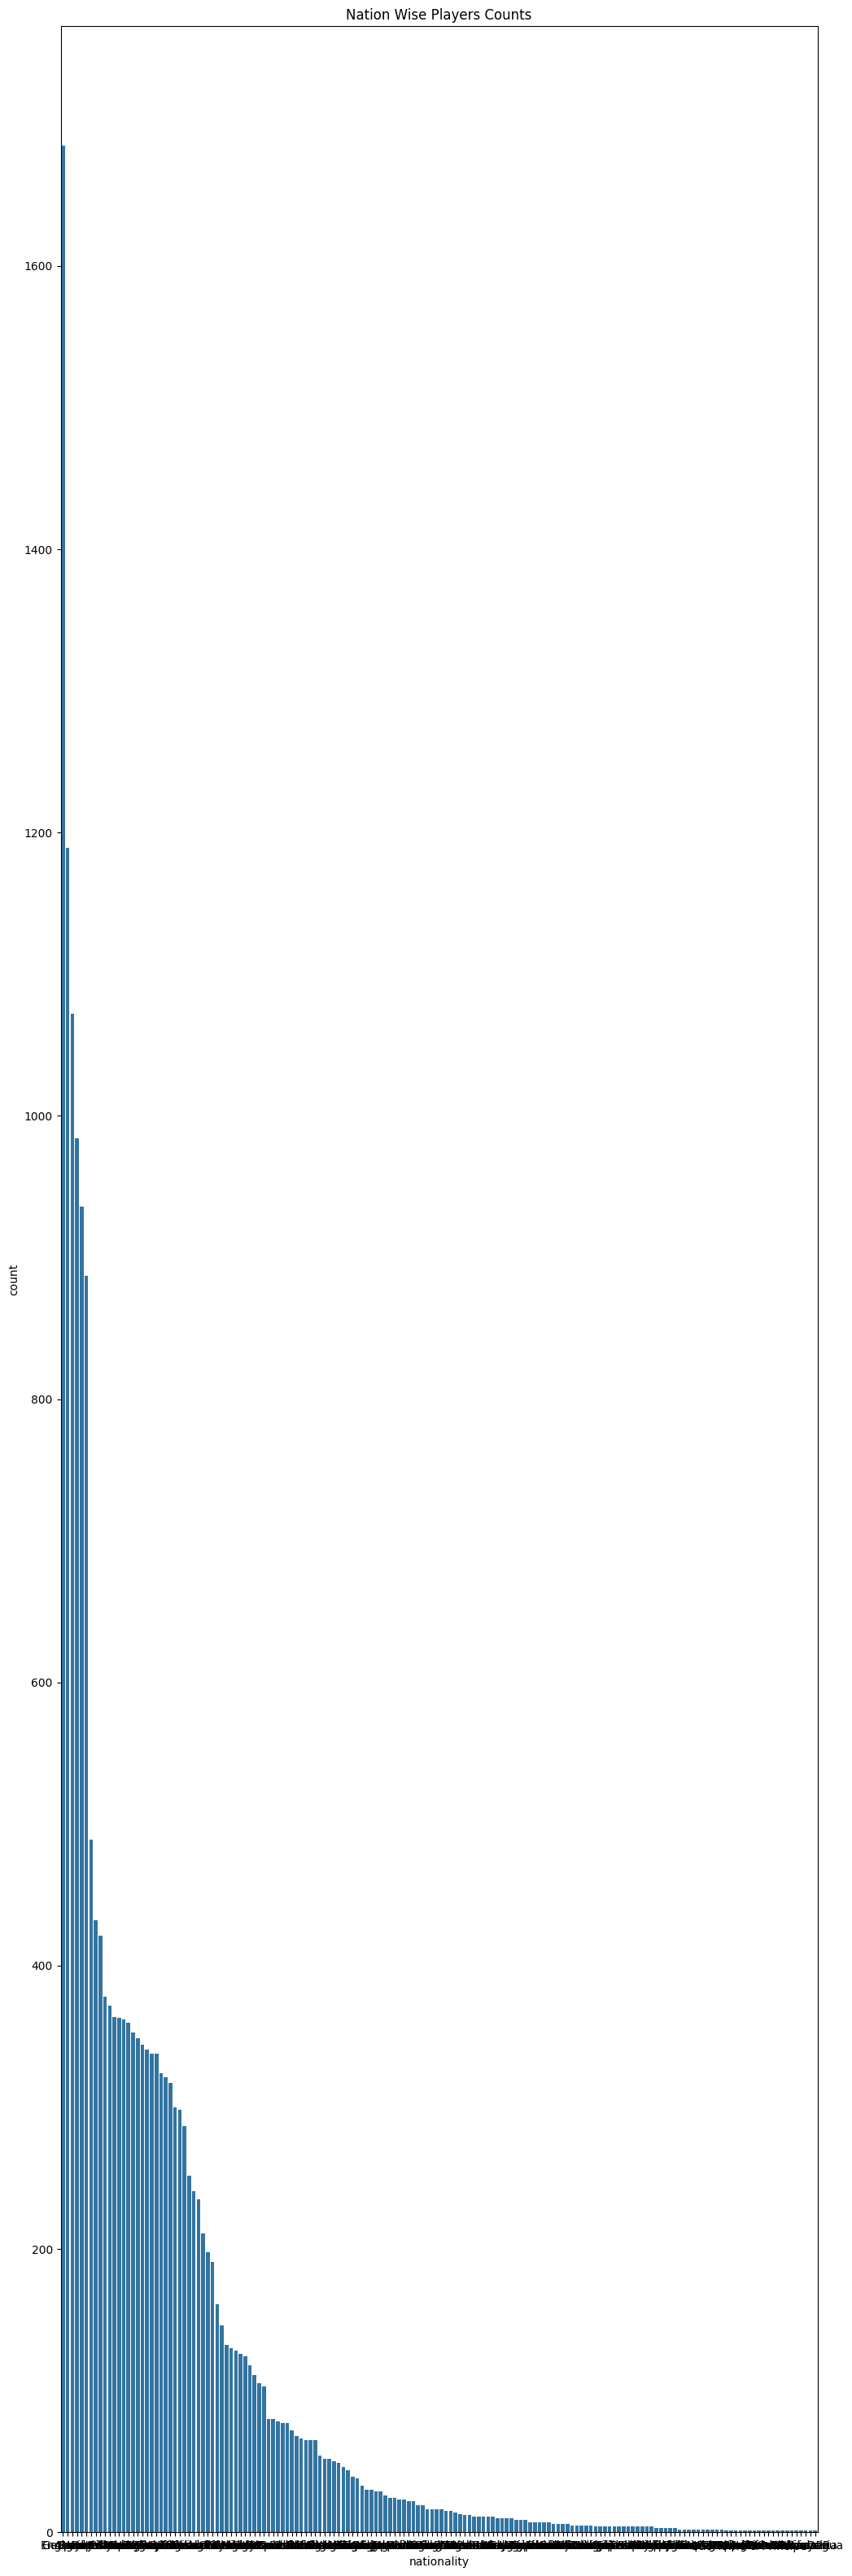

In [66]:
fifa_df['nationality'].value_counts()
#Total Unique Contries are 163
# Creating New Series with Countries more that 850 Value Counts and Plotting it 
countries_series=fifa_df['nationality'].value_counts()

# Now Drawing a Barplot --> Using Seaborn
mp.figure(figsize = (12, 40))
sns.barplot(countries_series)
mp.title("Nation Wise Players Counts");
mp.show()



## Analysing the Goalkeeper Data

In [27]:
(fifa_df.team_position == 'GK').sum()

np.int64(681)

In [28]:
fifa_df.shape

(18944, 61)

In [29]:
# The Below Method will fetch all the indices for the goalkeepers 
goal_keepers=[]
for i in range(0,18944):
	if(fifa_df.at[i,'team_position']=='GK'):
		goal_keepers.append(i)
	else:
		continue

In [30]:
len(goal_keepers) # Here we have successfully seperated the data of all the Goal Keepers 

681

In [31]:
# 681 players are Goalkeeper & Creating their seperate data frame to analyse them
goalkeepers_df =fifa_df.iloc[goal_keepers]

In [32]:
type(goalkeepers_df)

pandas.core.frame.DataFrame

**Successfully Seperated the Goalkeeper Data**

In [33]:
goalkeepers_df.head()

,short_name,age,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,international_reputation,skill_moves,work_rate,real_face,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,player_traits,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk_average,attacking_average,BMI,skill_avg,Mentality_avg,Movements_avg,Power_avg,defending_avg
2,J. Oblak,27,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,3,1,Medium/Medium,Yes,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,"GK Long Throw, Comes For Crosses",NaN,12,18,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,81.500000,19.0,24.615211,21.8,34.666667,61.4,53.6,NaN
7,M. ter Stegen,28,Germany,FC Barcelona,Spain Primera Division,1.0,90,93,69500000,260000,GK,3,1,Medium/Medium,Yes,GK,SUB,NaN,NaN,NaN,NaN,NaN,NaN,"Rushes Out Of Goal, Comes For Crosses, Saves w...",NaN,13,10,35+3,35+3,35+3,34+0,38+0,38+0,38+0,34+0,42+3,42+3,42+3,39+3,45+3,45+3,45+3,39+3,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3,80.666667,23.6,24.307244,28.8,40.166667,50.8,53.6,NaN
9,Alisson,27,Brazil,Liverpool,English Premier League,1.0,90,91,62500000,160000,GK,3,1,Medium/Medium,Yes,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"GK Long Throw, Rushes Out Of Goal",NaN,19,16,36+3,36+3,36+3,35+0,38+0,38+0,38+0,35+0,40+3,40+3,40+3,38+3,40+3,40+3,40+3,38+3,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3,81.666667,22.8,24.944492,27.6,34.166667,53.6,48.0,NaN
12,T. Courtois,28,Belgium,Real Madrid,Spain Primera Division,1.0,89,90,56000000,250000,GK,4,1,Medium/Medium,Yes,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,"GK Long Throw, Comes For Crosses",NaN,18,16,31+3,31+3,31+3,29+0,31+0,31+0,31+0,29+0,32+3,32+3,32+3,31+3,32+3,32+3,32+3,31+3,29+3,31+3,31+3,31+3,29+3,29+3,29+3,29+3,29+3,29+3,78.000000,17.2,24.241812,22.0,31.333333,56.8,49.8,NaN
16,M. Neuer,34,Germany,FC Bayern München,German 1. Bundesliga,1.0,89,89,29000000,125000,GK,5,1,Medium/Medium,Yes,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,"Leadership, GK Long Throw, Rushes Out Of Goal,...",NaN,10,11,39+3,39+3,39+3,40+0,43+0,43+0,43+0,40+0,46+3,46+3,46+3,43+3,48+3,48+3,48+3,43+3,36+3,42+3,42+3,42+3,36+3,34+3,34+3,34+3,34+3,34+3,82.833333,23.8,24.698650,32.0,43.000000,57.2,56.8,NaN


In [34]:
# dropping all the unecessary columns from goalkeepers_df
goalkeepers_df.drop(columns=['pace','shooting','passing','dribbling','defending','physic'],inplace=True)

C:\Users\Sian\AppData\Local\Temp\ipykernel_19936\3940782774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalkeepers_df.drop(columns=['pace','shooting','passing','dribbling','defending','physic'],inplace=True)


In [35]:
goalkeepers_df.columns

Index(['short_name', 'age', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'international_reputation', 'skill_moves',
       'work_rate', 'real_face', 'team_position', 'nation_position',
       'player_traits', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk_average',
       'attacking_average', 'BMI', 'skill_avg', 'Mentality_avg',
       'Movements_avg', 'Power_avg', 'defending_avg'],
      dtype='object')

In [36]:
goalkeepers_df.head()

,short_name,age,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,international_reputation,skill_moves,work_rate,real_face,team_position,nation_position,player_traits,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk_average,attacking_average,BMI,skill_avg,Mentality_avg,Movements_avg,Power_avg,defending_avg
2,J. Oblak,27,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,3,1,Medium/Medium,Yes,GK,GK,"GK Long Throw, Comes For Crosses",NaN,12,18,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,81.500000,19.0,24.615211,21.8,34.666667,61.4,53.6,NaN
7,M. ter Stegen,28,Germany,FC Barcelona,Spain Primera Division,1.0,90,93,69500000,260000,GK,3,1,Medium/Medium,Yes,GK,SUB,"Rushes Out Of Goal, Comes For Crosses, Saves w...",NaN,13,10,35+3,35+3,35+3,34+0,38+0,38+0,38+0,34+0,42+3,42+3,42+3,39+3,45+3,45+3,45+3,39+3,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3,80.666667,23.6,24.307244,28.8,40.166667,50.8,53.6,NaN
9,Alisson,27,Brazil,Liverpool,English Premier League,1.0,90,91,62500000,160000,GK,3,1,Medium/Medium,Yes,GK,NaN,"GK Long Throw, Rushes Out Of Goal",NaN,19,16,36+3,36+3,36+3,35+0,38+0,38+0,38+0,35+0,40+3,40+3,40+3,38+3,40+3,40+3,40+3,38+3,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3,81.666667,22.8,24.944492,27.6,34.166667,53.6,48.0,NaN
12,T. Courtois,28,Belgium,Real Madrid,Spain Primera Division,1.0,89,90,56000000,250000,GK,4,1,Medium/Medium,Yes,GK,GK,"GK Long Throw, Comes For Crosses",NaN,18,16,31+3,31+3,31+3,29+0,31+0,31+0,31+0,29+0,32+3,32+3,32+3,31+3,32+3,32+3,32+3,31+3,29+3,31+3,31+3,31+3,29+3,29+3,29+3,29+3,29+3,29+3,78.000000,17.2,24.241812,22.0,31.333333,56.8,49.8,NaN
16,M. Neuer,34,Germany,FC Bayern München,German 1. Bundesliga,1.0,89,89,29000000,125000,GK,5,1,Medium/Medium,Yes,GK,GK,"Leadership, GK Long Throw, Rushes Out Of Goal,...",NaN,10,11,39+3,39+3,39+3,40+0,43+0,43+0,43+0,40+0,46+3,46+3,46+3,43+3,48+3,48+3,48+3,43+3,36+3,42+3,42+3,42+3,36+3,34+3,34+3,34+3,34+3,34+3,82.833333,23.8,24.698650,32.0,43.000000,57.2,56.8,NaN


**Analysing all the properties Important to Goalkeepers**

In [37]:
goalkeepers_df['age'].describe()
# The Mean age for all the GoalKeepers is 28
# Counting the Number of Distribution in Between 
# 18-28 age group goal keepers 
print((goalkeepers_df.age>=18).sum()) #--> 680
print((goalkeepers_df.age<=28).sum())#--> 347
print((goalkeepers_df.age>28).sum())#--> 334
print(goalkeepers_df.shape)

681
347
334
(681, 55)


(array([ 21.,  36., 123., 109., 159.,  78., 100.,  35.,  16.,   4.]),
 array([18. , 20.5, 23. , 25.5, 28. , 30.5, 33. , 35.5, 38. , 40.5, 43. ]),
 <BarContainer object of 10 artists>)

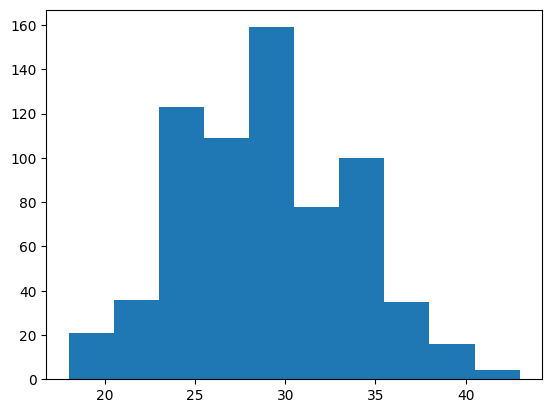

In [40]:
mp.hist(goalkeepers_df['age'])